In [11]:
import seaborn as sns
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [2]:
files = glob.glob("*")
print(files)

['0baseline_100_f1.csv', '1base_lex_100_f1.csv', 'final_100', 'interim_100', 'base_lex_100', '2Interim_100_f1.csv', 'baseline_100', 'Untitled.ipynb', '3finall_100_f1.csv']


In [103]:
_3final_f1=pd.read_csv("3finall_100_f1.csv", sep="\t", names = range(1,101))
_2interim_f1=pd.read_csv("2Interim_100_f1.csv", sep="\t", names = range(1,101))
_1baselinelex_f1=pd.read_csv("1base_lex_100_f1.csv", sep="\t", names = range(1,101))
_0baseline=pd.read_csv("0baseline_100_f1.csv", sep="\t", names = range(1,101))

In [121]:
_5finalall_f1 =pd.read_csv("5finalall_f1.csv", sep="\t", names = range(1,1463))
_4fbaselineall_f1 =pd.read_csv("4fbaselineall_f1.csv", sep="\t", names = range(1,1463))

In [122]:
_5finalall_f1

,1,2,3,4,5,6,7,8,9,10,...,1453,1454,1455,1456,1457,1458,1459,1460,1461,1462
0,0.33,0.43,0.57,0.42,0.47,0.24,0.25,0.55,0.25,0.75,...,0.36,0.24,0.29,0.26,0.26,0.33,0.19,0.25,0.25,0.19
1,0.33,0.43,0.57,0.42,0.47,0.24,0.25,0.55,0.25,0.75,...,0.36,0.24,0.26,0.32,0.26,0.33,0.19,0.05,0.25,0.19
2,0.33,0.43,0.57,0.42,0.47,0.24,0.25,0.55,0.25,0.75,...,0.36,0.24,0.26,0.26,0.26,0.33,0.19,0.25,0.25,0.19


In [104]:
for df in [_3final_f1, _2interim_f1, _1baselinelex_f1, _0baseline]:
    df.drop([10,15,17, 29], axis=1,inplace=True)

In [105]:
final_mean = [i for i in _3final_f1.mean()]
interim_mean = [i for i in _2interim_f1.mean()]
baselex_mean = [i for i in _1baselinelex_f1.mean()]
base_mean = [i for i in _0baseline.mean()]    

In [125]:
finalall_mean = [i for i in _5finalall_f1.mean() if i>0]
baseall_mean = [i for i in _4fbaselineall_f1.mean() if i>0]

In [130]:
# drop sentences with -1 
remain_index= [i for i in range(len(finalall_mean)) if finalall_mean[i]>0]
baseall_mean_remain = [baseall_mean[i] for i in remain_index]

In [106]:
# get the order of final_mean, sorted 
interim_mean_order = sorted(range(len(interim_mean)), key=lambda k: interim_mean[k])
# sort final_mean 
interim_mean.sort()

# sort interim_mean
final_mean_sorted = []
for i in interim_mean_order:
    final_mean_sorted.append(final_mean[i])

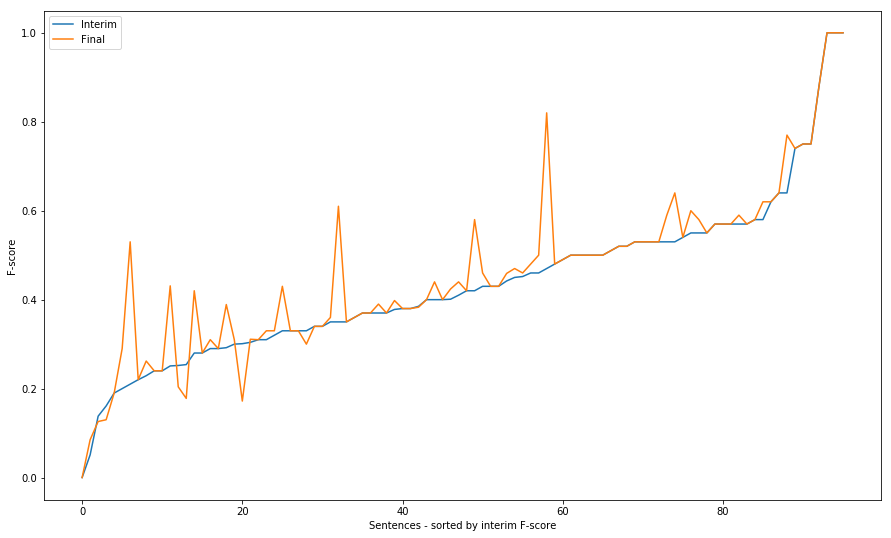

In [70]:
# x,y = enumerate(data)
fig, ax = plt.subplots(figsize=[15,9])
sns.lineplot(x = [i[0] for i in enumerate(interim_mean[0:100])], y = [i[1] for i in enumerate(interim_mean[0:100])], label="Interim")
sns.lineplot(x = [i[0] for i in enumerate(final_mean_sorted[0:100])], y = [i[1] for i in enumerate(final_mean_sorted[0:100])], label="Final")
ax.set_xlabel("Sentences - sorted by interim F-score")
ax.set_ylabel("F-score")
ax.figure.savefig("interim_final")

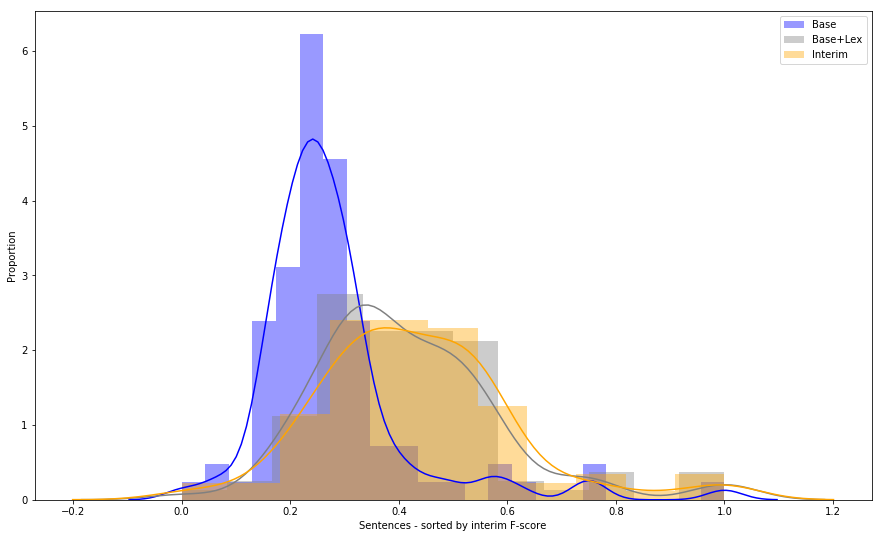

In [138]:
# x,y = enumerate(data)
fig, ax = plt.subplots(figsize=[15,9])
sns.distplot(base_mean, label="Base", color='b')
sns.distplot(baselex_mean, label="Base+Lex", color='grey')
sns.distplot(interim_mean, label="Interim", color='orange' )
ax.set_xlabel("Sentences - sorted by interim F-score")
ax.set_ylabel("Proportion")
plt.legend()
ax.figure.savefig("interim-f-scores")

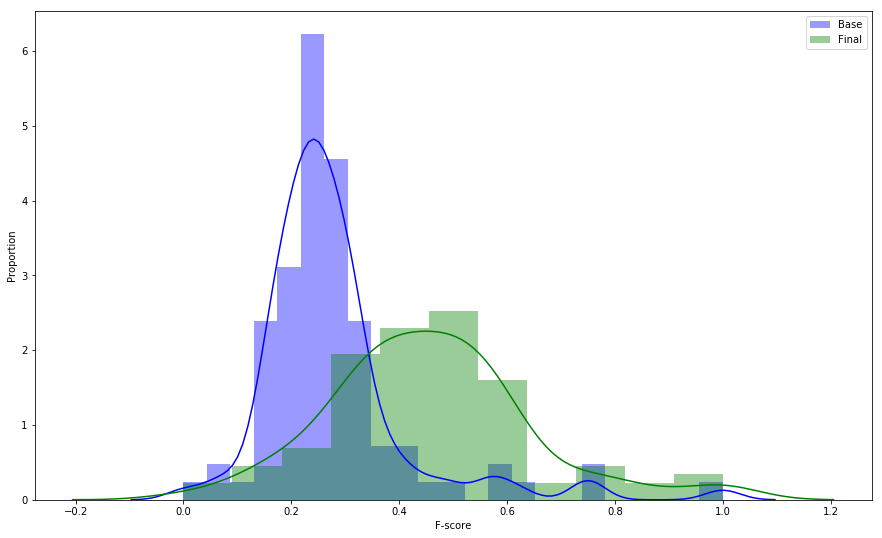

In [139]:
# x,y = enumerate(data)
fig, ax = plt.subplots(figsize=[15,9])
sns.distplot(base_mean, label="Base", color="b")
sns.distplot(final_mean, label="Final", color= 'g')
ax.set_xlabel("F-score")
ax.set_ylabel("Proportion")
plt.legend()
ax.figure.savefig("final-f-scores")

In [52]:
final_f1[40] - interim_f1[40]

0   -0.16
1    0.01
2    0.01
3    0.00
4   -0.16
5   -0.16
6    0.01
7   -0.16
8    0.01
9   -0.16
Name: 40, dtype: float64

In [53]:
final_f1[62] - interim_f1[62]

0    0.00
1    0.00
2   -0.21
3    0.00
4   -0.02
5    0.00
6    0.00
7   -0.23
8    0.00
9   -0.02
Name: 62, dtype: float64

In [54]:
interim_f1[25]

0    0.43
1    0.43
2    0.00
3    0.00
4    0.43
5    0.43
6    0.43
7    0.43
8    0.00
9    0.43
Name: 25, dtype: float64

In [85]:
min(interim_mean_order)

0

In [89]:
[i for i in zip(interim_mean_order,final_mean_sorted) if 0<i[1]<0.2]

[(79, 0.085),
 (18, 0.126),
 (56, 0.13000000000000003),
 (12, 0.18999999999999997),
 (39, 0.17800000000000002),
 (24, 0.172)]

In [90]:
[i for i in zip(interim_mean_order,final_mean_sorted) if 0.8<i[1]<1]

[(10, 0.8200000000000001), (37, 0.8800000000000001)]

In [91]:
[i for i in zip(interim_mean_order,final_mean_sorted) if i[1]==1]

[(44, 1.0), (82, 1.0), (97, 1.0)]

In [92]:
[i for i in zip(interim_mean_order,final_mean_sorted) if i[1]==0]

[(94, 0.0)]

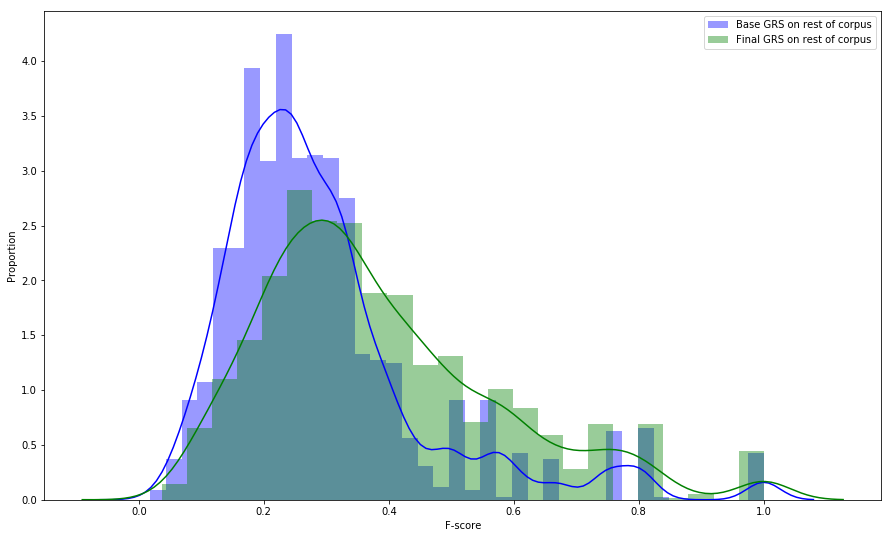

In [140]:
# x,y = enumerate(data)
fig, ax = plt.subplots(figsize=[15,9])
sns.distplot(baseall_mean_remain, label="Base GRS on rest of corpus", color="b")
sns.distplot(finalall_mean, label="Final GRS on rest of corpus", color= 'g')
ax.set_xlabel("F-score")
ax.set_ylabel("Proportion")
plt.legend()
ax.figure.savefig("allfinal-f-scores")

In [ ]:
# grab the UD annotations for the first 100 AMR sentences. 
	filenames = glob.glob('./data/amr_bank_data/ud/*')
	files_with_rel = set()
	mark_lemma = []
	for filename in filenames[0:101]:
		print(filename)
		ud_graph = load_data(filename)
		for node in ud_graph:
			for rel in ud_graph[node][1]:
				if "acl:relcl" in rel: 
					files_with_rel.add(filename)
					mark_lemma.append(ud_graph[rel[1]][0]['lemma'])

	print ("number of files with rel :",files_with_rel)
	print(len(files_with_rel))
	print(len(mark_lemma))
	print(collections.Counter(mark_lemma))

	token_length = []
	for filename in filenames[0:101]:
		token_length.append(len(load_data(filename)))

	print("min token lenght", min(token_length))
	print("max token lenght", max(token_length))
	print("average token lenght", sum(token_length)/100)